<a href="https://colab.research.google.com/github/aditya-rao1/MeyersBriggMLModel/blob/main/K_Nearest_Neighbors(Trial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions/General Plan

Independent variable is the amount of extraversion and the output is the posture based on it.


1. Need to replace every posture to a number based on the posture for the model to work
2. Split our data into categories. Our case would be 4 since A, B, C, D. 
3. Next you should be able to go onto your regular steps with machie learning

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Reading the Data into File

In [2]:
df = pd.read_csv("Myers Briggs Table_S1.csv")
df 

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0,ESTP,19,2,22,4,19,5,2,20,B
93,94,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0,ESFJ,11,10,17,9,6,18,13,9,B
94,95,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0,ENFP,12,9,9,17,6,18,2,20,A
95,96,28,67,180,Female,Low,0.0,0.0,0.0,0.0,ESFJ,11,10,22,14,8,16,14,8,B


Any duplicates?

In [3]:
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
      ...  
92    False
93    False
94    False
95    False
96    False
Length: 97, dtype: bool


### Preparing Data 

1 is for female. 2 is for male.



In [4]:
df['SEX'] = df['SEX'].replace('Female', 1)
df['SEX'] = df['SEX'].replace('Male', 2)
df['SEX'].head()

0    1
1    2
2    2
3    2
4    1
Name: SEX, dtype: int64

1 is for low activity. 2 is for moderate activity. 3 is for high activity.

In [5]:
df['ACTIVITY LEVEL'] = df['ACTIVITY LEVEL'].replace('Low', 1)
df['ACTIVITY LEVEL'] = df['ACTIVITY LEVEL'].replace('Moderate', 2)
df['ACTIVITY LEVEL'] = df['ACTIVITY LEVEL'].replace('High', 3)
df['ACTIVITY LEVEL'].head()

0    1
1    3
2    3
3    2
4    2
Name: ACTIVITY LEVEL, dtype: int64

1 is for A. 2 is for B. 3 is for C. 4 is for D.





In [6]:
df['POSTURE'] = df['POSTURE'].replace('A', 1)
df['POSTURE'] = df['POSTURE'].replace('B', 2)
df['POSTURE'] = df['POSTURE'].replace('C', 3)
df['POSTURE'] = df['POSTURE'].replace('D', 4)
df['POSTURE'].head()

0    1
1    2
2    1
3    4
4    1
Name: POSTURE, dtype: int64

In [7]:
df['MBTI'] = df['MBTI'].replace('ESTJ', 1)
df['MBTI'] = df['MBTI'].replace('ENTJ', 2)
df['MBTI'] = df['MBTI'].replace('ESFJ', 3)
df['MBTI'] = df['MBTI'].replace('ENFJ', 4)
df['MBTI'] = df['MBTI'].replace('ISTJ', 5)
df['MBTI'] = df['MBTI'].replace('ISFJ', 6)
df['MBTI'] = df['MBTI'].replace('INTJ', 7)
df['MBTI'] = df['MBTI'].replace('INFJ', 8)
df['MBTI'] = df['MBTI'].replace('ESTP', 9)
df['MBTI'] = df['MBTI'].replace('ESFP', 10)
df['MBTI'] = df['MBTI'].replace('ENTP', 11)
df['MBTI'] = df['MBTI'].replace('ENFP', 12)
df['MBTI'] = df['MBTI'].replace('ISTP', 13)
df['MBTI'] = df['MBTI'].replace('ISFP', 14)
df['MBTI'] = df['MBTI'].replace('INTP', 15)
df['MBTI'] = df['MBTI'].replace('INFP', 16)

### Data Visualization

In [8]:
df.describe()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
count,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,43.855670,65.731959,159.43299,1.494845,1.298969,2.139175,3.747423,1.943299,2.530928,8.082474,12.690722,8.288660,15.134021,11.041237,10.505155,13.443299,10.319588,11.680412,2.381443
std,28.145456,16.776093,3.737522,36.19591,0.502571,0.580319,2.572635,3.191071,2.587909,3.111483,4.433937,5.717956,5.697146,4.833970,4.732242,5.332924,5.297344,5.727395,5.711003,1.055179
min,1.000000,11.000000,58.000000,68.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,5.000000,1.000000,0.000000,2.000000,0.000000,2.000000,1.000000
25%,25.000000,30.000000,63.000000,135.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,8.000000,3.000000,12.000000,7.000000,6.000000,10.000000,5.000000,6.000000,2.000000
50%,49.000000,45.000000,66.000000,157.00000,1.000000,1.000000,1.000000,3.000000,0.500000,0.000000,9.000000,13.000000,8.000000,15.000000,11.000000,11.000000,13.000000,11.000000,11.000000,2.000000
75%,73.000000,56.000000,68.000000,183.00000,2.000000,1.000000,4.000000,7.000000,3.500000,5.000000,12.000000,18.000000,13.000000,19.000000,14.000000,14.000000,18.000000,16.000000,17.000000,3.000000
max,97.000000,82.000000,74.000000,263.00000,2.000000,3.000000,9.500000,10.000000,10.000000,10.000000,16.000000,21.000000,19.000000,25.000000,21.000000,22.000000,24.000000,20.000000,22.000000,4.000000


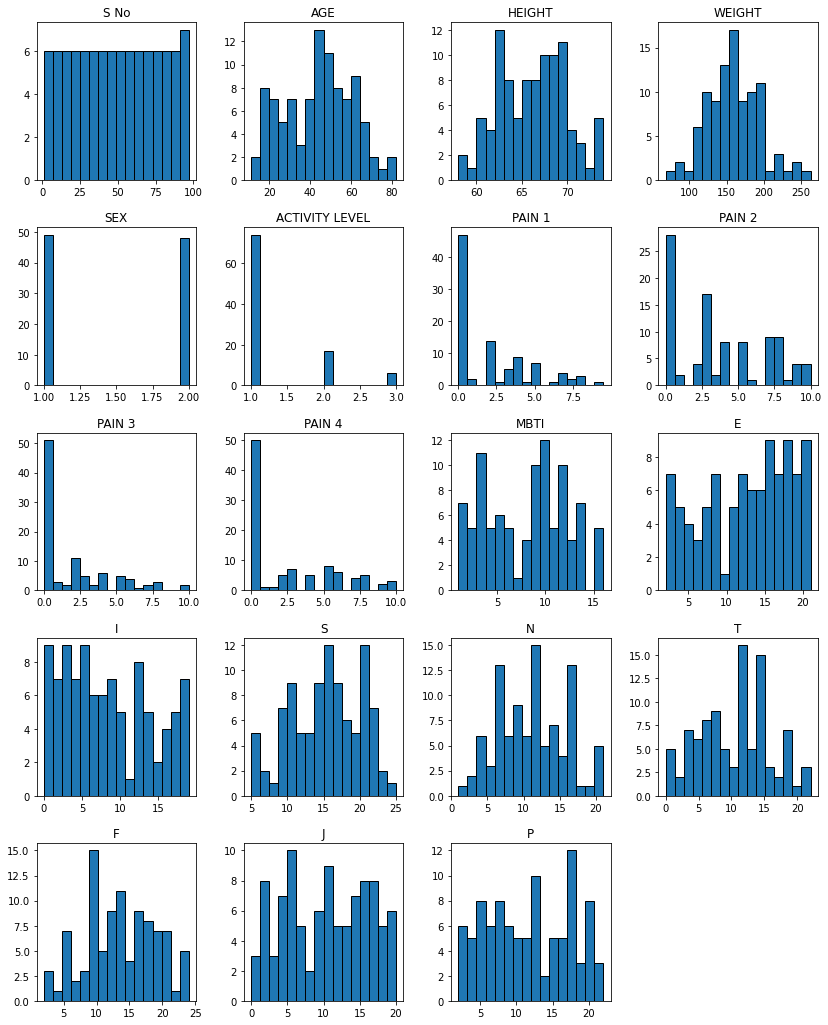

In [9]:
df[['S No', 'AGE', 'HEIGHT', 'WEIGHT', 'SEX', 'ACTIVITY LEVEL', 'PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4', 'MBTI', 'E', 'I', 'S', 'N', 'T', 'F', 'J', 'P']].hist(figsize = (14, 18), bins = 16, linewidth = 1, edgecolor = 'k', grid = False)
plt.show()

### Training

This will scale the data so the entries will be enough for the model to do its work

In [10]:
from sklearn.preprocessing import MinMaxScaler
independent_variable = df.drop(['POSTURE'], axis = 1)


scaler = MinMaxScaler()
independent_variable = scaler.fit_transform(independent_variable)
dependent_variable = df['POSTURE']

In [11]:
#This command will split the data into training and testing data with the size of 20 percent on each.
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(independent_variable, dependent_variable, test_size = 0.1, random_state = 1)



In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [13]:
y_pred = knn.predict(x_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.20      0.33      0.25         3
           3       1.00      0.50      0.67         4
           4       0.00      0.00      0.00         1

    accuracy                           0.40        10
   macro avg       0.42      0.33      0.35        10
weighted avg       0.56      0.40      0.44        10

[[1 1 0 0]
 [1 1 0 1]
 [0 2 2 0]
 [0 1 0 0]]


After testing different amounts of clusters 40 percent accuracy was the best correlation I could get after adjusting n_neighbors.

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(y_test, y_pred)
print(accuracy_score)

0.4


### Support Vector Machines